# Question 2

In [38]:
## Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Read data

In [2]:
pitching_df = pd.read_csv('pitching.csv')
pitching_df.head(5)

,playerID,nameFirst,nameLast,nameGiven,yearID,stint,teamID,lgID,W,L,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,abbotda01,Dan,Abbott,Leander Franklin,1890,1,TL2,AA,0,2,...,NaN,0.0,0.0,0,0.0,2.0,14,NaN,NaN,NaN
1,abbeybe01,Bert,Abbey,Bert Wood,1892,1,WAS,NL,5,18,...,NaN,11.0,0.0,0,0.0,3.0,139,NaN,NaN,NaN
2,abbeybe01,Bert,Abbey,Bert Wood,1893,1,CHN,NL,2,4,...,NaN,2.0,0.0,0,0.0,0.0,52,NaN,NaN,NaN
3,abbeybe01,Bert,Abbey,Bert Wood,1894,1,CHN,NL,2,7,...,NaN,0.0,0.0,0,0.0,0.0,74,NaN,NaN,NaN
4,abbeybe01,Bert,Abbey,Bert Wood,1895,2,BRO,NL,5,2,...,NaN,2.0,0.0,0,0.0,2.0,34,NaN,NaN,NaN


In [3]:
teams_df = pd.read_csv('teams.csv')
teams_df.head(5)

,yearID,lgID,teamID,franchID,franchName,divID,Rank,G,Ghome,W,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,Boston Red Stockings,NaN,3,31,NaN,20,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,Chicago White Stockings,NaN,2,28,NaN,19,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,Cleveland Forest Citys,NaN,8,29,NaN,10,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,Fort Wayne Kekiongas,NaN,7,19,NaN,7,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,New York Mutuals,NaN,5,33,NaN,16,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [4]:
players_df = pd.read_csv('players.csv')
players_df.head(5)

,nameFirst,nameLast,nameGiven,playerID,yearID,stint,teamID,lgID,G,AB,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
0,John,Abadie,John W.,abadijo01,1875,1,PH3,NaN,11,45,...,1,0,0,3,NaN,NaN,NaN,NaN,NaN,NaN
1,John,Abadie,John W.,abadijo01,1875,2,BR2,NaN,1,4,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,Jose,Acosta,Jose,acostjo01,1920,1,WS1,AL,17,25,...,0,0,4,7,NaN,0.0,2.0,NaN,NaN,NaN
3,Jose,Acosta,Jose,acostjo01,1921,1,WS1,AL,33,30,...,1,0,6,14,NaN,0.0,1.0,NaN,NaN,NaN
4,Jose,Acosta,Jose,acostjo01,1922,1,CHA,AL,5,5,...,0,0,1,1,NaN,0.0,0.0,NaN,NaN,NaN


## Task 1: In the year of 2011-2015, Is a team’s win-loss record related to its payrolls?

In [5]:
## Compute the total number of wins for each of the teams in MLB over 2011-2015, sort them in a descending order
teams_df_filtered = teams_df[teams_df['yearID'].between(2011, 2015)]
sum_win_filtered_1 = teams_df_filtered.groupby('teamID')['W'].sum().sort_values(ascending = False).reset_index()
# sum_win_filtered_2 = teams_df_filtered.groupby(['yearID', 'teamID'])['W'].sum().sort_values(ascending = False)
# sum_win_filtered_3 = teams_df_filtered.groupby('yearID')['W'].sum().sort_values(ascending = False)
sum_win_filtered_1.head()

,teamID,W
0,SLN,465
1,NYA,448
2,LAN,446
3,WAS,443
4,DET,440


In [6]:
## Compute the average payroll per year for all teams over 2011-2015, sort them in a descending order.

players_df_filtered = players_df[players_df['yearID'].between(2011, 2015)]

# Calc payroll each team
payroll_by_team = players_df_filtered.groupby(['yearID', 'teamID'])['salary'].sum().reset_index()
# payroll_by_team.head(10)

# Calc average per year
mean_payroll = payroll_by_team.groupby('teamID')['salary'].mean().sort_values(ascending = False).reset_index()
mean_payroll.head(5)

,teamID,salary
0,NYA,204717513.4
1,LAN,170401274.0
2,PHI,161337694.6
3,BOS,154501998.4
4,SFN,139546203.4


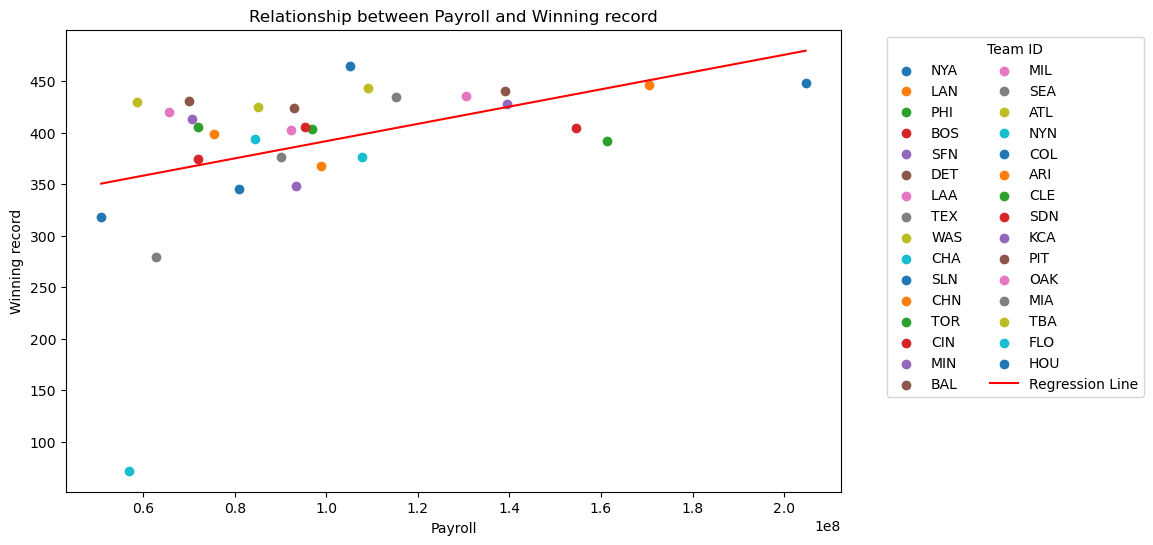

The correlation coefficient 0.43 and R-squared value 0.18 show moderate relationship between Payroll and Winning record


In [53]:
## Create a visualization of your choice which will all allow you to 
# show whether a team’s winning record is related to its payroll. So is a team’s winning record related to its payroll?
new = pd.merge(mean_payroll, sum_win_filtered_1, on = 'teamID')

plt.figure(figsize=(10, 6))
for team in new['teamID']:
    team_data = new[new['teamID'] == team]
    plt.scatter(team_data['salary'], team_data['W'], label=team, marker='o')

X = new['salary'].values.reshape(-1, 1)
y = new['W'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(new['salary'], y_pred, color='red', label='Regression Line')

# Calc correlation coefficient
corr_coef = np.corrcoef(new['salary'], new['W'])[0, 1]

# Calc R-squared value
r_squared = r2_score(y, y_pred)

x_axis1 = 'Payroll'
y_axis1 = 'Winning record'
plt.xlabel(x_axis1)
plt.ylabel(y_axis1)
plt.title(f'Relationship between {x_axis1} and {y_axis1}')
plt.legend(title='Team ID', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2) 
plt.show()

print(f'The correlation coefficient {corr_coef:.2f} and R-squared value {r_squared:.2f} show moderate relationship between {x_axis1} and {y_axis1}')

## Task 2: In the year of 2011-2015, Is a player’s batting performance related to his team’s win-loss record?

In [15]:
## Compute the Batting Averages for each of the MLB teams over 2011-2015, sort them in a descending order. The Batting Average is defined as Hits/At Bats. 
# The average is calculated from all players in each team.

AB_sum = players_df_filtered.groupby('teamID')['AB'].sum()
H_sum = players_df_filtered.groupby('teamID')['H'].sum()
batting_avr = pd.merge(AB_sum, H_sum, on= 'teamID')
batting_avr['BA'] = batting_avr['H']/batting_avr['AB']
batting_avr_sorted = batting_avr['BA'].sort_values(ascending = False)
batting_avr_sorted.head(5)

teamID
DET    0.275054
COL    0.268635
TEX    0.266463
KCA    0.266219
BOS    0.265485
Name: BA, dtype: float64

The correlation coefficient 0.34 and R-squared value 0.11 show moderate relationship between Batting average and Winning record


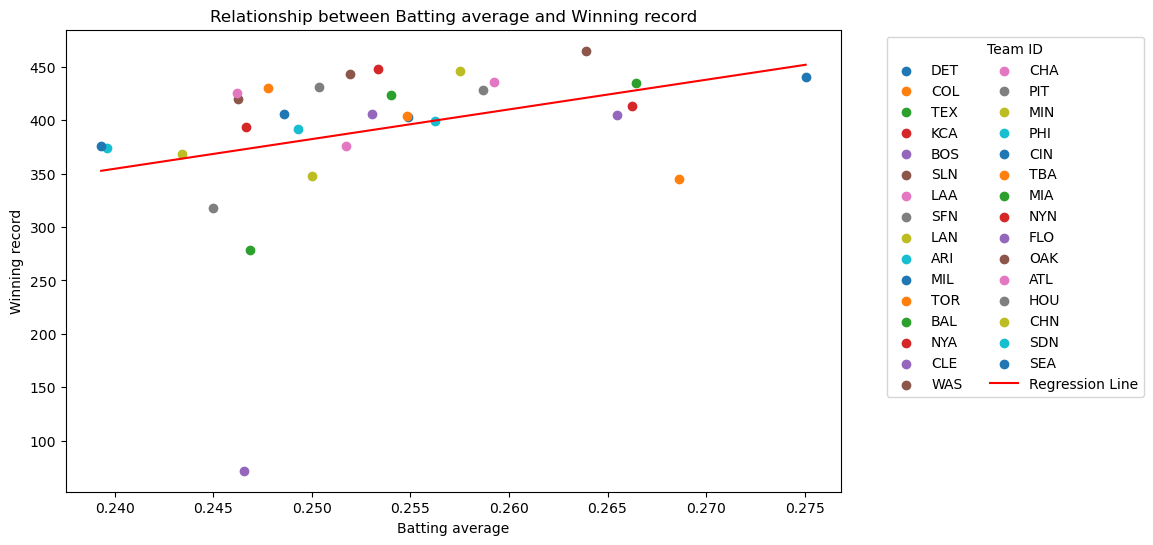

In [52]:
## Create a visualization of your choice which will allow you to decide whether a team’s batting average
# is related to its win-loss record. So is a team’s winning record related to its batting average?
plot_2 = pd.merge(batting_avr_sorted, sum_win_filtered_1, on = 'teamID')

plt.figure(figsize=(10, 6))
for team in plot_2['teamID']:
    each_team = plot_2[plot_2['teamID'] == team] # draw scatter point each by each
    plt.scatter(each_team['BA'], each_team['W'], label = team, marker = 'o')

X_2 = plot_2['BA'].values.reshape(-1, 1)
y_2 = plot_2['W'].values
model_2 = LinearRegression()
model_2.fit(X_2, y_2)
y_pred_2 = model_2.predict(X_2)
plt.plot(plot_2['BA'], y_pred_2, color='red', label='Regression Line')

# Calc correlation coefficient
corr_coef_2 = np.corrcoef(plot_2['BA'], plot_2['W'])[0, 1]

# Calc R-squared value
r_squared_2 = r2_score(y_2, y_pred_2)

x_axis2 = 'Batting average'
y_axis2 = 'Winning record'
plt.xlabel(x_axis2)
plt.ylabel(y_axis2)
plt.title(f'Relationship between {x_axis2} and {y_axis2}')
plt.legend(title='Team ID', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2) 
plt.show

print(f'The correlation coefficient {corr_coef_2:.2f} and R-squared value {r_squared_2:.2f} show moderate relationship between {x_axis2} and {y_axis2}')

## Task 3: In the year of 2011-2015, is a team’s win-loss record related to its pitching performance?

In [49]:
## Display the average ERA (Earned Run Average) for each of the MLB teams in 2011-2015, 
# sort them in a descending order. A lower ERA indicates a better pitching performance.

pitching_df_filtered = pitching_df[pitching_df['yearID'].between(2011, 2015)]

ERA_sorted = pitching_df_filtered.groupby('teamID')['ERA'].mean().sort_values(ascending = False)
ERA_sorted.head(5)

teamID
TOR    6.277933
LAA    6.012016
NYN    5.886875
NYA    5.846667
COL    5.826370
Name: ERA, dtype: float64

The correlation coefficient -0.02 and R-squared value 0.00 show a negligible relationship between Average ERA and Winning record


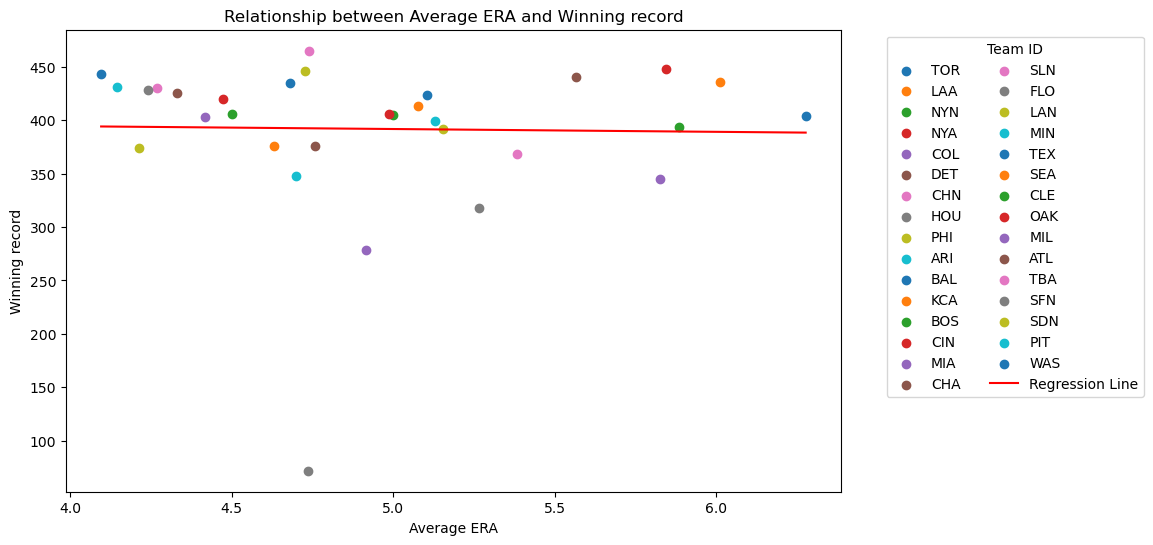

In [51]:
## Create a visualization of your choice which will allow you to decide if a team’s win-loss record is related to its pitching performance. 
# So is a team’s winning record related to its pitching performance?

plot_3 = pd.merge(ERA_sorted, sum_win_filtered_1, on = 'teamID')

plt.figure(figsize=(10, 6))
for team in plot_3['teamID']:
    each_team = plot_3[plot_3['teamID'] == team] # draw scatter point each by each
    plt.scatter(each_team['ERA'], each_team['W'], label = team, marker = 'o')

X_3 = plot_3['ERA'].values.reshape(-1, 1)
y_3 = plot_3['W'].values
model_3 = LinearRegression()
model_3.fit(X_3, y_3)
y_pred_3 = model_3.predict(X_3)
plt.plot(plot_3['ERA'], y_pred_3, color='red', label='Regression Line')

# Calc correlation coefficient
corr_coef_3 = np.corrcoef(plot_3['ERA'], plot_3['W'])[0, 1]

# Calc R-squared value
r_squared_3 = r2_score(y_3, y_pred_3)

x_axis3 = 'Average ERA'
y_axis3 = 'Winning record'
plt.xlabel(x_axis3)
plt.ylabel(y_axis3)
plt.title(f'Relationship between {x_axis3} and {y_axis3}')
plt.legend(title='Team ID', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2) 
plt.show

print(f'The correlation coefficient {corr_coef_3:.2f} and R-squared value {r_squared_3:.2f} show a negligible relationship between {x_axis3} and {y_axis3}')